# Data Preprocessing / Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
loan_train_df = pd.read_csv('./Loan_App_Data/train.csv')
loan_test_df = pd.read_csv('./Loan_App_Data/test.csv')

In [3]:
loan_train_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Converting Categorical Data

In [4]:
def convertData(df, cols):
    for feature in cols:
        newdf = pd.get_dummies(df[feature])
        newdf = pd.get_dummies(df[feature],drop_first=True)
        df = pd.concat([df,newdf],axis=1)
        df.drop([feature],axis=1,inplace=True)
        if len(newdf.columns) == 1:
            df.rename({newdf.columns[0]: feature},inplace=True, axis='columns')
    return df
df = convertData(loan_train_df,['Gender', 'Married','Education','Self_Employed','Loan_Status','Property_Area','Dependents'])
df

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Education,Self_Employed,Loan_Status,Semiurban,Urban,1,2,3+
0,LP001002,5849,0.0,NaN,360.0,1.0,1,0,0,0,1,0,1,0,0,0
1,LP001003,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0,1,0,0
2,LP001005,3000,0.0,66.0,360.0,1.0,1,1,0,1,1,0,1,0,0,0
3,LP001006,2583,2358.0,120.0,360.0,1.0,1,1,1,0,1,0,1,0,0,0
4,LP001008,6000,0.0,141.0,360.0,1.0,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,2900,0.0,71.0,360.0,1.0,0,0,0,0,1,0,0,0,0,0
610,LP002979,4106,0.0,40.0,180.0,1.0,1,1,0,0,1,0,0,0,0,1
611,LP002983,8072,240.0,253.0,360.0,1.0,1,1,0,0,1,0,1,1,0,0
612,LP002984,7583,0.0,187.0,360.0,1.0,1,1,0,0,1,0,1,0,1,0


## Converting DataTypes

In [5]:
# Seeing our datatypes
df.dtypes

Loan_ID               object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Gender                 uint8
Married                uint8
Education              uint8
Self_Employed          uint8
Loan_Status            uint8
Semiurban              uint8
Urban                  uint8
1                      uint8
2                      uint8
3+                     uint8
dtype: object

In [6]:
#

## Removing non-essential data

In [7]:
# We don't need Loan_ID since its just an identifier. It has no correlation to anything and will not affect our outcomes
print(f"Unique Loan_ID {len(df['Loan_ID'].unique())}")
print(f"Total Rows: {len(df)}")

Unique Loan_ID 614
Total Rows: 614


In [8]:
df.drop(['Loan_ID'], axis=1, inplace=True)
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Education,Self_Employed,Loan_Status,Semiurban,Urban,1,2,3+
0,5849,0.0,NaN,360.0,1.0,1,0,0,0,1,0,1,0,0,0
1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,1,1,0,1,0,0,0
3,2583,2358.0,120.0,360.0,1.0,1,1,1,0,1,0,1,0,0,0
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,0,0,0,0,1,0,0,0,0,0
610,4106,0.0,40.0,180.0,1.0,1,1,0,0,1,0,0,0,0,1
611,8072,240.0,253.0,360.0,1.0,1,1,0,0,1,0,1,1,0,0
612,7583,0.0,187.0,360.0,1.0,1,1,0,0,1,0,1,0,1,0


## Dealing with missing values


In [9]:
# There seems to be missing values scattered around the features.
print(f"Are there any NaN values: {df.isnull().values.any()}")
display(df.isnull().sum().sort_values(ascending=False))

Are there any NaN values: True


Credit_History       50
LoanAmount           22
Loan_Amount_Term     14
ApplicantIncome       0
CoapplicantIncome     0
Gender                0
Married               0
Education             0
Self_Employed         0
Loan_Status           0
Semiurban             0
Urban                 0
1                     0
2                     0
3+                    0
dtype: int64

<AxesSubplot:>

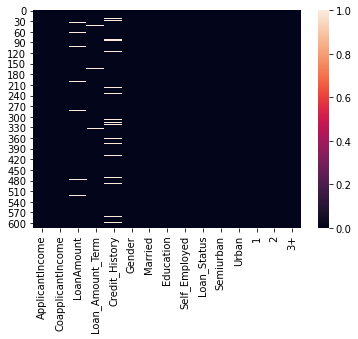

In [16]:
sns.heatmap(df.isnull())

Is there a relationship between someone not having a Loan_Amount_Term, LoanAmount, or CreditHistory and being denied a loan?

<AxesSubplot:>

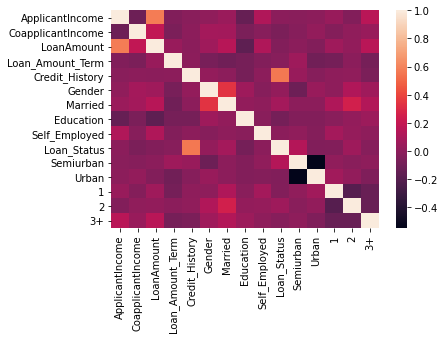

In [21]:
sns.heatmap(df.corr())

There seems to be a strong relationship between "Credit History" and "Loan_Status" along with "ApplicantIncome" and "LoanAmount".

In [23]:
df[['Credit_History','Loan_Status']]

,Credit_History,Loan_Status
0,1.0,1
1,1.0,0
2,1.0,1
3,1.0,1
4,1.0,1
...,...,...
609,1.0,1
610,1.0,1
611,1.0,1
612,1.0,1


Text(0.5, 1.0, 'Comparing Credit History with Loan Status')

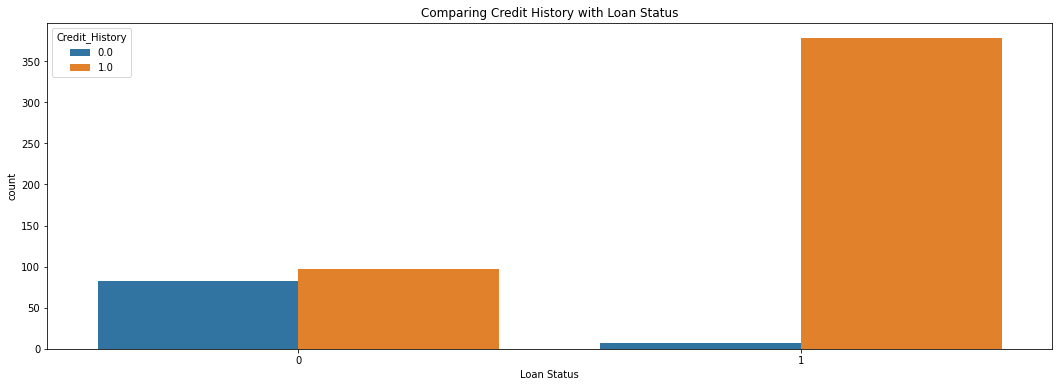

In [34]:
plt.figure(figsize = (18,6))
sns.countplot(x='Loan_Status', hue='Credit_History',data=df);
plt.xlabel("Loan Status")
plt.title("Comparing Credit History with Loan Status")

It is safe to assume that if the Credit History is zero (bad Credit Card History) then the chances of being approved for a loan is low. Can we also assume that if we replace Nan values with zeros this will still hold true?

All Nan values are located within the "Credit History", "LoanAmount", "Loan_Amount_Term" features.
These are the following methods to choose from: 

1. [] ~~Deleting Rows with missing values~~
2. [] ~~Replace all Nan values with zeros~~
3. [X] Impute missing values for continuous variables
4. [] ~~Impute missing values for categorical variable~~
5. [] ~~Other Imputation Methods~~
6. [] ~~Using Algorithms that support missing values~~
        Both Support Vector and Random Forest require complete data sets
7. [] ~~Prediction of missing values~~


### Lets play around with mean values in place of missing values

In [37]:
# Creating as save state
mean_df = df
# Converting all NaN values to mean of the feature
def convert_NaN_To_Mean(old_df, features):
    for feature in features:
        mean = old_df[feature].mean()
        old_
    mean_CoAppIncome =old_df['CoapplicantIncome'].mean()
    mean_df['CoapplicantIncome'] = mean_df['CoapplicantIncome'].replace(np.nan, mean_CoAppIncome)
    return newdf
mean_df

IndentationError: expected an indented block (<ipython-input-37-8fabb6130667>, line 6)